# DATA 602: Project 2

According to the NFL website, the Baltimore Ravens have a “reputation for strong defensive play,” and I wanted to see if this was always the case.

For my Project 2, I will be reviewing NFL Players' Defensive Statistics from 1970-2016 to determine how the Ravens' Defense ranks amongst the rest of the NFL. I hypothesize that the Ravens' defensive players have performed above average overall, especially in the more modern era of football (1995-2016)

To answer this question, I will be using a dataset on Kaggle from user kendallgillies, who scraped the NFL website for NFL statistics and then organized this data into multiple .csv files https://www.kaggle.com/datasets/kendallgillies/nflstatistics. Because my question focuses on defensive statistics, I will be using the file called "Career_Stats_Defensive.csv"

## Preparing Dataset

In [176]:
import pandas as pd

df = pd.read_csv("Career_Stats_Defensive.csv")
display(df)

,Player Id,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return
0,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--
1,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1,1,0,0.0,--,0,--,--,--,0.0,--
2,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--
3,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0,--,--,--,--,--,--,--,--,0.0,--
4,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4,4,0,0.0,--,0,--,--,--,0.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,torreysmith/2495459,"Smith, Torrey",WR,2012,Baltimore Ravens,16,1,1,0,0.0,0,0,--,--,--,0.0,--
23994,torreysmith/2495459,"Smith, Torrey",WR,2011,Baltimore Ravens,16,2,2,0,0.0,0,0,--,--,--,0.0,--
23995,j.d.folsom/238485,"Folsom, J.D.",NaN,2009,Miami Dolphins,2,1,1,0,0.0,--,0,--,--,--,0.0,--
23996,jamiereader/2502599,"Reader, Jamie",NaN,2001,Philadelphia Eagles,16,7,7,0,0.0,--,0,--,--,--,0.0,--


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Id           23998 non-null  object 
 1   Name                23998 non-null  object 
 2   Position            6955 non-null   object 
 3   Year                23998 non-null  int64  
 4   Team                23998 non-null  object 
 5   Games Played        23998 non-null  int64  
 6   Total Tackles       23998 non-null  object 
 7   Solo Tackles        23998 non-null  object 
 8   Assisted Tackles    23998 non-null  object 
 9   Sacks               23998 non-null  object 
 10  Safties             23998 non-null  object 
 11  Passes Defended     23998 non-null  object 
 12  Ints                23998 non-null  object 
 13  Ints for TDs        23998 non-null  object 
 14  Int Yards           23998 non-null  object 
 15  Yards Per Int       23998 non-null  float64
 16  Long

In [178]:
for column in df.columns:
    print(df[column].value_counts())

Player Id
mortenandersen/2499416    25
johncarney/2499991        25
jefffeagles/2500608       22
adamvinatieri/2503471     21
jasonhanson/2501016       21
                          ..
charlesriggins/2524161     1
peteittersagen/2507612     1
lacedwards/2555558         1
justonburris/2555313       1
byronjohnson/2517578       1
Name: count, Length: 4302, dtype: int64
Name
Matthews, Clay       27
Washington, Ted      27
Johnson, Charles     26
Harris, Al           25
Andersen, Morten     25
                     ..
Burbridge, Aaron      1
Taylor, Derrick       1
Morrison, Antonio     1
Lasco, Daniel         1
Johnson, Byron        1
Name: count, Length: 4232, dtype: int64
Position
WR     795
DE     766
OLB    607
RB     571
CB     567
TE     523
DB     461
QB     442
DT     423
LB     342
SS     282
FS     274
K      242
P      183
ILB    154
NT     123
MLB     95
FB      95
SAF     10
Name: count, dtype: int64
Year
2016    1537
2015    1414
2014    1316
2013    1194
2012    1098
2011    

Data looks good, but there are some missing values, particularly in with the position of the player. However, there are also many missing values in the form of `"--"` in many different columns, so let's replace these with null values to get a better picture of how much data is truly missing.

In [179]:
import numpy as np
df = df.replace('--', np.nan)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Id           23998 non-null  object 
 1   Name                23998 non-null  object 
 2   Position            6955 non-null   object 
 3   Year                23998 non-null  int64  
 4   Team                23998 non-null  object 
 5   Games Played        23998 non-null  int64  
 6   Total Tackles       16589 non-null  object 
 7   Solo Tackles        13447 non-null  object 
 8   Assisted Tackles    13447 non-null  object 
 9   Sacks               18612 non-null  object 
 10  Safties             5971 non-null   object 
 11  Passes Defended     18612 non-null  object 
 12  Ints                4611 non-null   object 
 13  Ints for TDs        4611 non-null   object 
 14  Int Yards           4611 non-null   object 
 15  Yards Per Int       23998 non-null  float64
 16  Long

As you can see, there are quite a few missing values, but we will deal with that later depending on our calculations. Now we will just make the data more usable for calculations (string to float, etc). We will also use regex to see if any of the values don't make sense

In [180]:
# function that checks if everything is actually numeric
def check_columns_numeric(numeric_cols, df):
    for col in numeric_cols:
        print(col)
        df["temp"] = df[col].astype(str)
        where_numeric = df.index[df["temp"].str.match(r'^[-+]?(\d+(\.\d*)?|\.\d+)$')]
        not_numeric = df["temp"].loc[df.index.difference(where_numeric)]
        print(not_numeric[not_numeric != "nan"])

    return df.drop(columns="temp")

In [181]:
# these columns should be numeric are not floats/strings
numeric_cols = ["Total Tackles", "Solo Tackles", "Assisted Tackles", "Sacks", "Safties", "Passes Defended", "Ints", "Ints for TDs",
                "Int Yards", "Yards Per Int", "Longest Int Return"]

df = check_columns_numeric(numeric_cols, df)

Total Tackles
Series([], Name: temp, dtype: object)
Solo Tackles
Series([], Name: temp, dtype: object)
Assisted Tackles
Series([], Name: temp, dtype: object)
Sacks
Series([], Name: temp, dtype: object)
Safties
Series([], Name: temp, dtype: object)
Passes Defended
Series([], Name: temp, dtype: object)
Ints
Series([], Name: temp, dtype: object)
Ints for TDs
Series([], Name: temp, dtype: object)
Int Yards
Series([], Name: temp, dtype: object)
Yards Per Int
Series([], Name: temp, dtype: object)
Longest Int Return
34       36T
48       63T
83       37T
85       70T
87       58T
        ... 
23836    15T
23865    48T
23867    76T
23944    52T
23949    13T
Name: temp, Length: 726, dtype: object


There are some "T" characters in the last column that we need to get rid of to convert everything to floats/ints

In [182]:
# get rid of Ts so its just an integer like everything else
df['Longest Int Return'] = df['Longest Int Return'].str.replace('T', '', regex=True)

# final check if everything is actually numeric
df = check_columns_numeric(numeric_cols, df)

Total Tackles
Series([], Name: temp, dtype: object)
Solo Tackles
Series([], Name: temp, dtype: object)
Assisted Tackles
Series([], Name: temp, dtype: object)
Sacks
Series([], Name: temp, dtype: object)
Safties
Series([], Name: temp, dtype: object)
Passes Defended
Series([], Name: temp, dtype: object)
Ints
Series([], Name: temp, dtype: object)
Ints for TDs
Series([], Name: temp, dtype: object)
Int Yards
Series([], Name: temp, dtype: object)
Yards Per Int
Series([], Name: temp, dtype: object)
Longest Int Return
Series([], Name: temp, dtype: object)


In [183]:
# we are good to go! so convert all numeric columns to float
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="raise") # there should not be any errors since we checked earlier, but just in case

In [184]:
display(df)
display(df.info())

,Player Id,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return
0,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN
2,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4.0,4.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,torreysmith/2495459,"Smith, Torrey",WR,2012,Baltimore Ravens,16,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
23994,torreysmith/2495459,"Smith, Torrey",WR,2011,Baltimore Ravens,16,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
23995,j.d.folsom/238485,"Folsom, J.D.",NaN,2009,Miami Dolphins,2,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN
23996,jamiereader/2502599,"Reader, Jamie",NaN,2001,Philadelphia Eagles,16,7.0,7.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Id           23998 non-null  object 
 1   Name                23998 non-null  object 
 2   Position            6955 non-null   object 
 3   Year                23998 non-null  int64  
 4   Team                23998 non-null  object 
 5   Games Played        23998 non-null  int64  
 6   Total Tackles       16589 non-null  float64
 7   Solo Tackles        13447 non-null  float64
 8   Assisted Tackles    13447 non-null  float64
 9   Sacks               18612 non-null  float64
 10  Safties             5971 non-null   float64
 11  Passes Defended     18612 non-null  float64
 12  Ints                4611 non-null   float64
 13  Ints for TDs        4611 non-null   float64
 14  Int Yards           4611 non-null   float64
 15  Yards Per Int       23998 non-null  float64
 16  Long

None

## Dealing with Missing Values

Things are much more complicated because of the many missing values. First, I want to see if missing values are associated with a certain time period because maybe the data doesn't exist because its too old

In [185]:
# chose 6 because the majority of them are missing some of the rows (such as position)
nulls_vs_years = pd.DataFrame({"Missing": df.loc[df.isnull().sum(axis=1) > 6, "Year"].value_counts(), "Total": df["Year"].value_counts()})
nulls_vs_years["Ratio Missing"] = nulls_vs_years.iloc[:, 0] / nulls_vs_years.iloc[:, 1] 
nulls_vs_years = nulls_vs_years.sort_values(by=['Ratio Missing'], ascending=False)
display(nulls_vs_years)

,Missing,Total,Ratio Missing
Year,,,
1970,1,1,1.000000
1972,9,9,1.000000
1973,19,19,1.000000
1974,24,24,1.000000
1971,6,6,1.000000
1977,64,67,0.955224
1979,109,115,0.947826
1975,35,37,0.945946
1976,47,50,0.940000


In [186]:
# seems like things before 1990s are mostly missing, so I have to change my objective a bit and start focusing on 1999 onward. 
# I wanted to look at their performance throughout all of history, but this dataset does not allow for that :(
df = df.loc[df["Year"] >= 1995]
df

,Player Id,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return
0,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN
2,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4.0,4.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,torreysmith/2495459,"Smith, Torrey",WR,2013,Baltimore Ravens,16,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
23993,torreysmith/2495459,"Smith, Torrey",WR,2012,Baltimore Ravens,16,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
23994,torreysmith/2495459,"Smith, Torrey",WR,2011,Baltimore Ravens,16,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
23995,j.d.folsom/238485,"Folsom, J.D.",NaN,2009,Miami Dolphins,2,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN


Unfortunately, due to the nature of the dataset, I cannot interpolate the rest of the missing data points based on the data. I think the best thing I can do is impute the missing values with the median of each column based on the number of games played. Even though this won't be the most accurate, players with missing values will have a score closer to the average of other players, which makes it more fair/accurate than counting all the missing values as 0s. This will still allow players who made big plays to stand out and have a higher score.

In [187]:
# imputing medians for each column based on number of games played
for games_played in df["Games Played"].unique():
    index = df.index[df["Games Played"] == games_played]
    for column in numeric_cols:
        if games_played > 0:
            df.loc[index, column] = df.loc[index, column].fillna(df.loc[index, column].median())
        else:
            df.loc[index, column] = df.loc[index, column].fillna(0)

df

,Player Id,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return
0,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,22.0,0.0,19.5
2,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,torreysmith/2495459,"Smith, Torrey",WR,2013,Baltimore Ravens,16,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,22.0,0.0,19.5
23993,torreysmith/2495459,"Smith, Torrey",WR,2012,Baltimore Ravens,16,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,22.0,0.0,19.5
23994,torreysmith/2495459,"Smith, Torrey",WR,2011,Baltimore Ravens,16,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,22.0,0.0,19.5
23995,j.d.folsom/238485,"Folsom, J.D.",NaN,2009,Miami Dolphins,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.5,0.0,4.5


## Calculating Player Scores

For my first metric to see how well the Raven's players do compared to other players, I will calculate an overall "defense score" for each player to see how Ravens' players stack up compared to the rest of NFL

The defense score will be calculated similar to defensive team scores in fantasy football but not exactly the same since we don't have the same data in this dataset. Solo Tackles 1 pt, Assisted tackles 0.5 pts, Sacks = 2 pts, Safeties = 2 pts, Int = 3 pts, Passes defended = 1 pt, Ints for TDs/Defensive Touchdown = 6 pts. I will give them arbitrary scores for the following columns: 1 pt for every 10 yards in yards per int, 1.5 pt for every 10 yards in a longest int return. I will also keep in mind the number of games they played to get an average per game score for that year.

In [188]:
# now we can finally calculate the player scores
df["Avg Defense Score"] = (df["Solo Tackles"] + (df["Assisted Tackles"] * 0.5) + (df["Sacks"] * 2) 
                           + (df["Safties"] * 2) + (df["Ints"] * 3) + df["Passes Defended"] + (df["Ints for TDs"] * 6)
                           + (df["Yards Per Int"]/10) + ((df["Longest Int Return"]*1.5)/10)) / df["Games Played"]

# fill NaN with 0 since some games played were 0
df["Avg Defense Score"] = df["Avg Defense Score"].fillna(0)

In [189]:
# look at best defense scores players had in a single year
df.nlargest(10, "Avg Defense Score")

,Player Id,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return,Avg Defense Score
12764,paulposluszny/2495712,"Posluszny, Paul",MLB,2013,Jacksonville Jaguars,15,162.0,122.0,40.0,3.0,0.0,9.0,2.0,1.0,69.0,34.5,59.0,12.086667
7490,ronbartell/2506389,"Bartell, Ron",NaN,2012,Detroit Lions,1,9.0,6.0,3.0,0.0,0.0,1.0,0.5,0.0,6.0,0.0,12.0,11.800000
17048,hamzaabdullah/2506563,"Abdullah, Hamza",NaN,2009,Arizona Cardinals,1,9.0,8.0,1.0,0.0,0.0,0.0,0.5,0.0,6.0,0.0,12.0,11.800000
14529,kennyphillips/1375,"Phillips, Kenny",NaN,2009,New York Giants,2,13.0,9.0,4.0,0.0,0.0,2.0,2.0,0.0,22.0,11.0,22.0,11.700000
1179,harlanmiller/2555174,"Miller, Harlan",FS,2016,Arizona Cardinals,2,7.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,52.0,52.0,52.0,11.500000
6381,raylewis/2501750,"Lewis, Ray",NaN,2002,Baltimore Ravens,5,57.0,42.0,15.0,0.0,0.0,1.0,2.0,0.0,4.0,2.0,4.0,11.460000
6380,raylewis/2501750,"Lewis, Ray",NaN,2003,Baltimore Ravens,16,161.0,120.0,41.0,1.5,0.0,7.0,6.0,1.0,99.0,16.5,37.0,11.356250
19042,tyvonbranch/1681,"Branch, Tyvon",DB,2014,Oakland Raiders,3,30.0,23.0,7.0,1.0,0.0,1.0,1.0,0.0,9.5,0.0,9.5,11.308333
10964,navorrobowman/2508088,"Bowman, NaVorro",ILB,2013,San Francisco 49ers,16,145.0,120.0,25.0,5.0,0.0,8.0,2.0,1.0,93.0,46.5,89.0,11.281250
13842,seanlee/496937,"Lee, Sean",OLB,2013,Dallas Cowboys,11,99.0,68.0,31.0,0.0,0.0,6.0,4.0,1.0,174.0,43.5,74.0,11.177273


We see the famous Ray Lewis! Now try to combine all players years together to see how well they did. If they changed teams, I will keep those separate so we can see how players performed overall on different teams

In [190]:
player_scores = []
for player in df[["Player Id", "Team"]].value_counts().index:
    mean_score = df.loc[(df["Player Id"] == player[0]) & (df["Team"] == player[1]), "Avg Defense Score"].mean()
    player_scores.append({"Player": player[0], "Team": player[1], "Avg Defense Score": mean_score})

player_scores_df = pd.DataFrame(player_scores)

In [191]:
display(player_scores_df.nlargest(10, "Avg Defense Score"))
print(len(player_scores_df))

,Player,Team,Avg Defense Score
4639,ronbartell/2506389,Detroit Lions,11.800000
5976,harlanmiller/2555174,Arizona Cardinals,11.500000
873,lukekuechly/2533056,Carolina Panthers,9.718279
958,donnieedwards/2500516,San Diego Chargers,9.560000
6932,deionjones/2555162,Atlanta Falcons,9.500000
6239,kikoalonso/2539935,Buffalo Bills,9.296875
497,paulposluszny/2495712,Jacksonville Jaguars,9.262480
2011,alecogletree/2540143,St. Louis Rams,9.237500
931,lavontedavid/2532828,Tampa Bay Buccaneers,9.123196
3396,kwonalexander/2552592,Tampa Bay Buccaneers,9.104167


7679


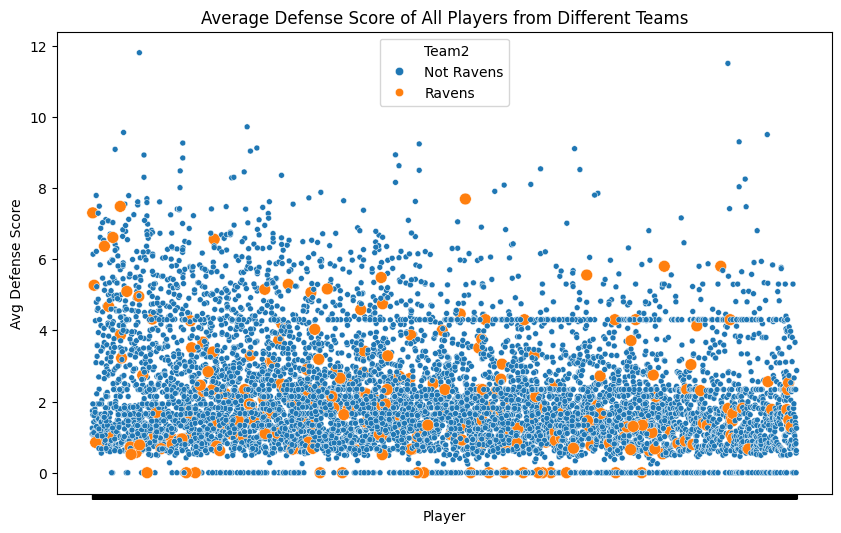

In [192]:
# We dont see ravens in the top here. Maybe we need to graph it to see it better
import seaborn as sns  
import matplotlib.pyplot as plt

player_scores_df.loc[player_scores_df["Team"] != "Baltimore Ravens", "Team2"] = "Not Ravens"
player_scores_df.loc[player_scores_df["Team"] == "Baltimore Ravens", "Team2"] = "Ravens"
player_scores_df["size"] = np.where(player_scores_df["Team2"] != "Ravens", "Medium", "Small")

plt.figure(figsize=(10,6))
#sns.barplot(player_scores_df, x = "Player", hue = "Team2", y = "Avg Defense Score", errorbar=None, width=2)
ax = sns.scatterplot(player_scores_df, x = "Player", hue = "Team2", y = "Avg Defense Score", size_order=("Small", "Medium"), size="size")
h, l = ax.get_legend_handles_labels()
ax.legend(h[0:3], l[0:3])
plt.title("Average Defense Score of All Players from Different Teams")
plt.gca().set_xticklabels([])
plt.show()

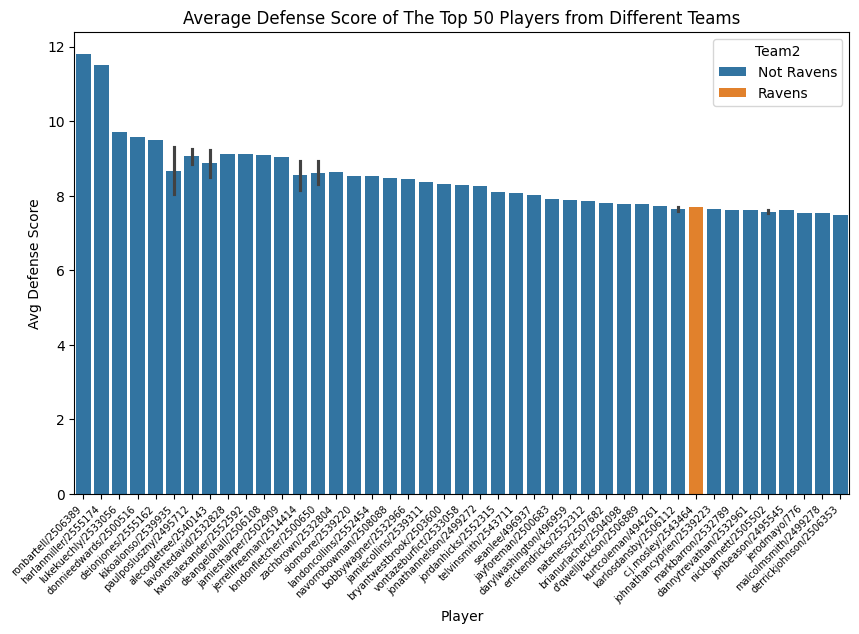

In [193]:
# also graph the top 50 players
plt.figure(figsize=(10,6))
sns.barplot(player_scores_df.nlargest(50, "Avg Defense Score"), x = "Player", hue = "Team2", y = "Avg Defense Score")
plt.title("Average Defense Score of The Top 50 Players from Different Teams")
plt.xticks(rotation = 45, ha="right", fontsize=7)
plt.show()

Overall it seems that Ravens defensive players from 1995-2016 perform around or above average compared to the rest of the NFL. They have a couple high performing defensive players, but not the best of the best according to this data set.

## Calculating Overall Team Score
We looked at how well individual players do and what teams they are affiliated with, but now we can find the averages for the teams as a whole to get a different view on Ravens' defensive performance

In [194]:
# Some teams have changed their names over the years, so i need to combine those
df["Team"] = df["Team"].replace("St. Louis Rams", "Los Angeles Rams")
df["Team"] = df["Team"].replace("Tennessee Oilers", "Tennessee Titans")
df["Team"] = df["Team"].replace("Houston Oilers", "Tennessee Titans")
df["Team"] = df["Team"].replace("Tennessee Oilers", "Tennessee Titans")
df["Team"] = df["Team"].replace("Oakland Raiders", "Las Vegas Raiders")
df["Team"] = df["Team"].replace("Washington Redskins", "Washington Commanders")
df["Team"] = df["Team"].replace("San Diego Chargers", "Los Angeles Chargers")

team_scores = []
for team in df["Team"].unique():
    team_scores.append({"Team": team, "Avg Defense Score": df.loc[df["Team"] == team, "Avg Defense Score"].mean()})

team_scores_df = pd.DataFrame(team_scores)

In [195]:
team_scores_df.nlargest(5, "Avg Defense Score")
# There they are!!

,Team,Avg Defense Score
11,Kansas City Chiefs,2.528686
5,Indianapolis Colts,2.512050
9,Baltimore Ravens,2.497624
27,Houston Texans,2.463134
13,Los Angeles Rams,2.458618


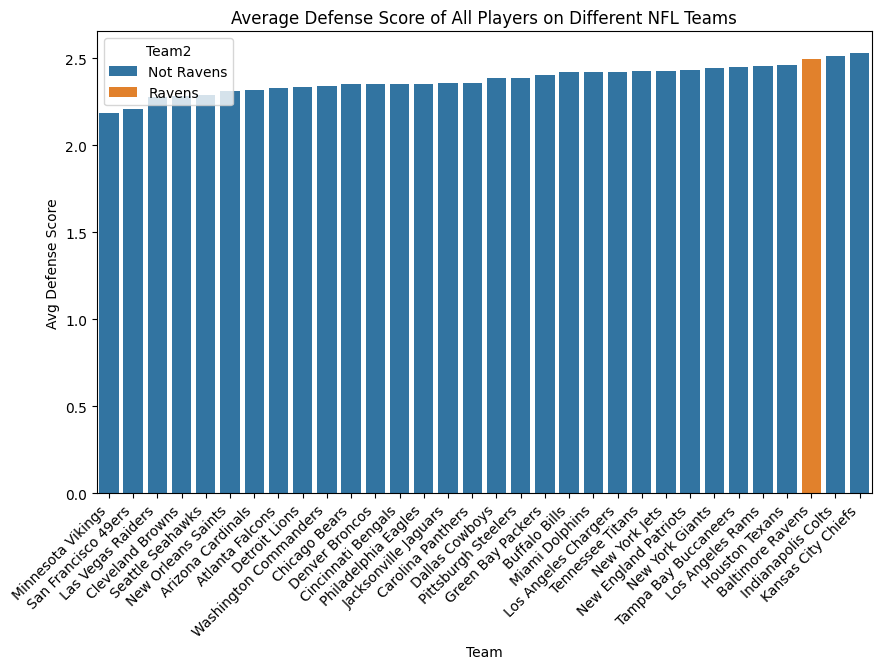

In [198]:
plt.figure(figsize=(10,6))
team_scores_df = team_scores_df.sort_values(by="Avg Defense Score")
team_scores_df.loc[team_scores_df["Team"] != "Baltimore Ravens", "Team2"] = "Not Ravens"
team_scores_df.loc[team_scores_df["Team"] == "Baltimore Ravens", "Team2"] = "Ravens"
sns.barplot(team_scores_df, x = "Team", hue = "Team2", y = "Avg Defense Score")
plt.xticks(rotation=45, ha="right")
plt.title("Average Defense Score of All Players on Different NFL Teams")
plt.show()

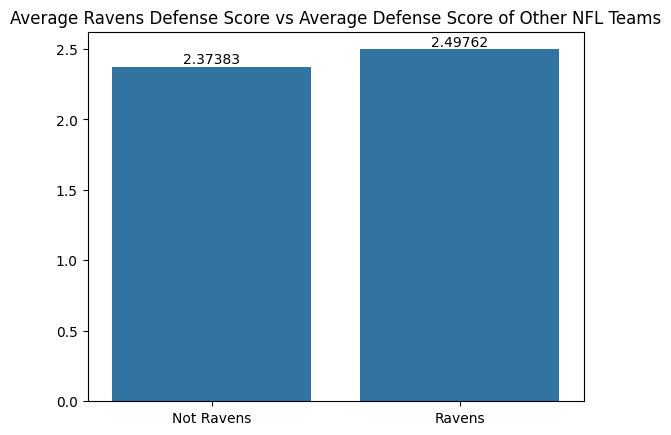

In [199]:
rest_of_nfl_avg = team_scores_df.loc[team_scores_df["Team2"] == "Not Ravens", "Avg Defense Score"].mean()
ravens_avg = team_scores_df.loc[team_scores_df["Team2"] == "Ravens", "Avg Defense Score"].values[0]
ax = sns.barplot(x = ["Not Ravens", "Ravens"], y=[rest_of_nfl_avg, ravens_avg])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Average Ravens Defense Score vs Average Defense Score of Other NFL Teams")
plt.show()

## Conclusion
Overall, it seems that the Ravens' (at least from 1995-2016) are one of the strongest defensive teams when it comes to the NFL. They may have not had the highest scoring defensive players over the years, but they still have had a handful of strong players. When it comes to overall defensive power, the average defensive stats of all of their players combined are some of the highest in the NFL. The team as a whole has above average defense compared to the rest of the NFL, so I would say my hypothesis is correct. To further explore this topic, I would like to look at how the Ravens' defense have performed on a yearly basis compared to the rest of the NFL. I was also interested in looking at the team defense stats, since this dataset focused more on individual players and thus missed out on some of the team-based stats such as points allowed.